# Sensitivity

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Sensitivity](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, create_model, copies

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model_HANK = create_model(name='HANK', par={'HH_type':'HA'})

HANK


## 2. <a id='toc2_'></a>[Sensitivity](#toc0_)

### phi_I ###
{'phi_I': 0.01}


{'phi_I': 70.0}


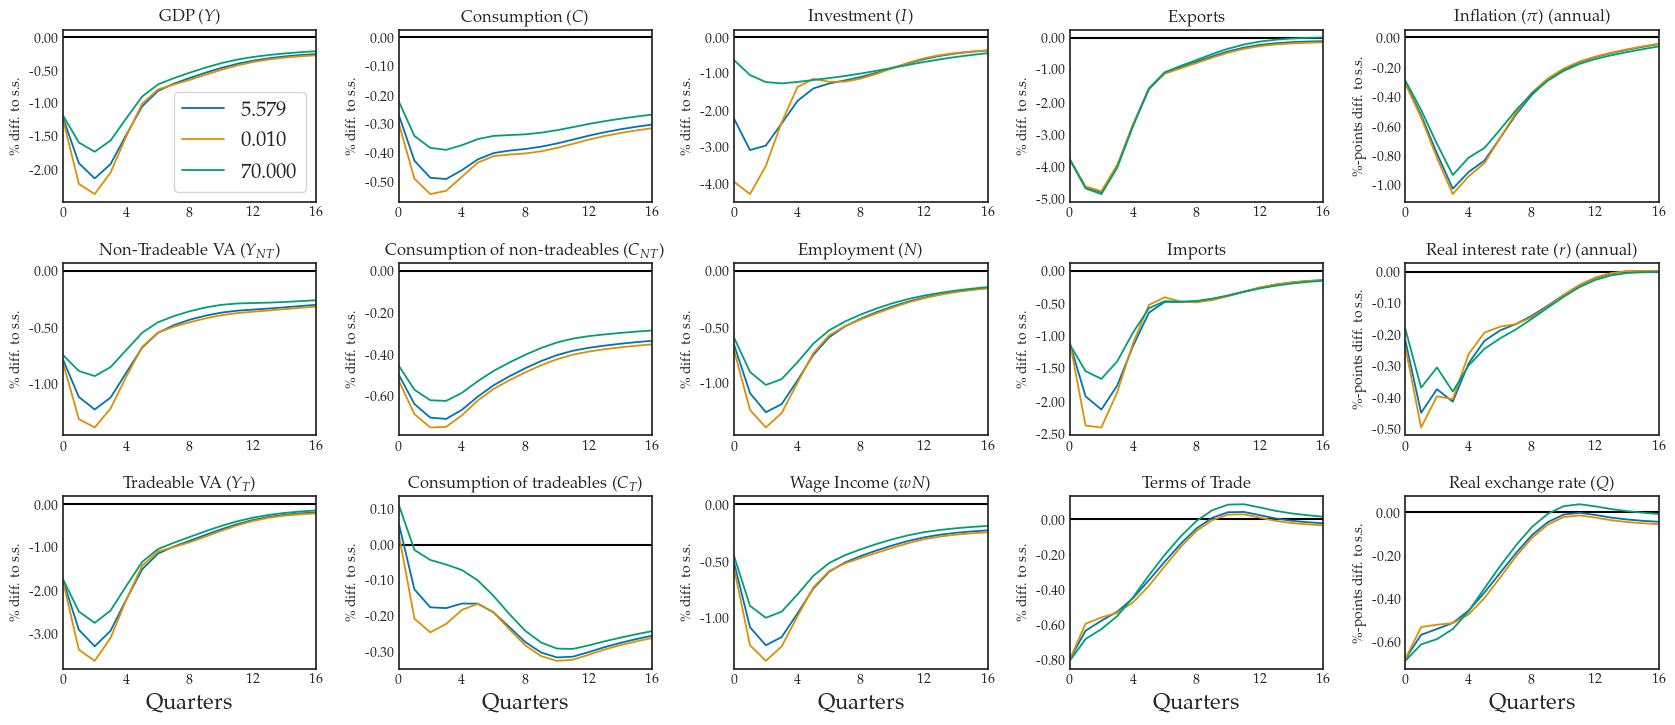

### kappa_r ###
{'kappa_r': 0.0}


{'kappa_r': 0.5780360568171898}


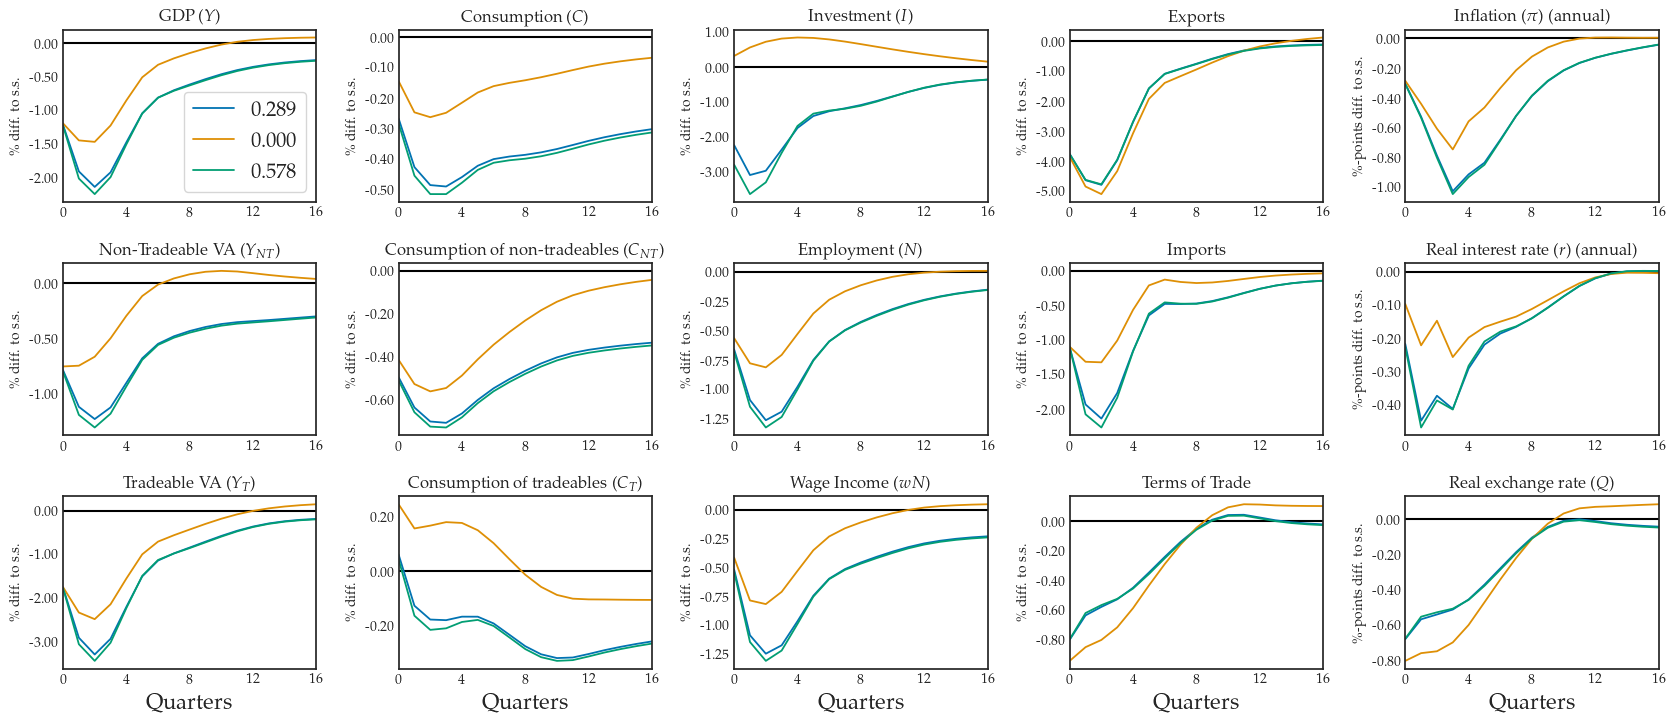

### NKslope__T ###
{'NKslope__T': 0.03725329447498475}


GEModelTools: No improvement for 5 iterations
{'NKslope__T': 0.149013177899939}


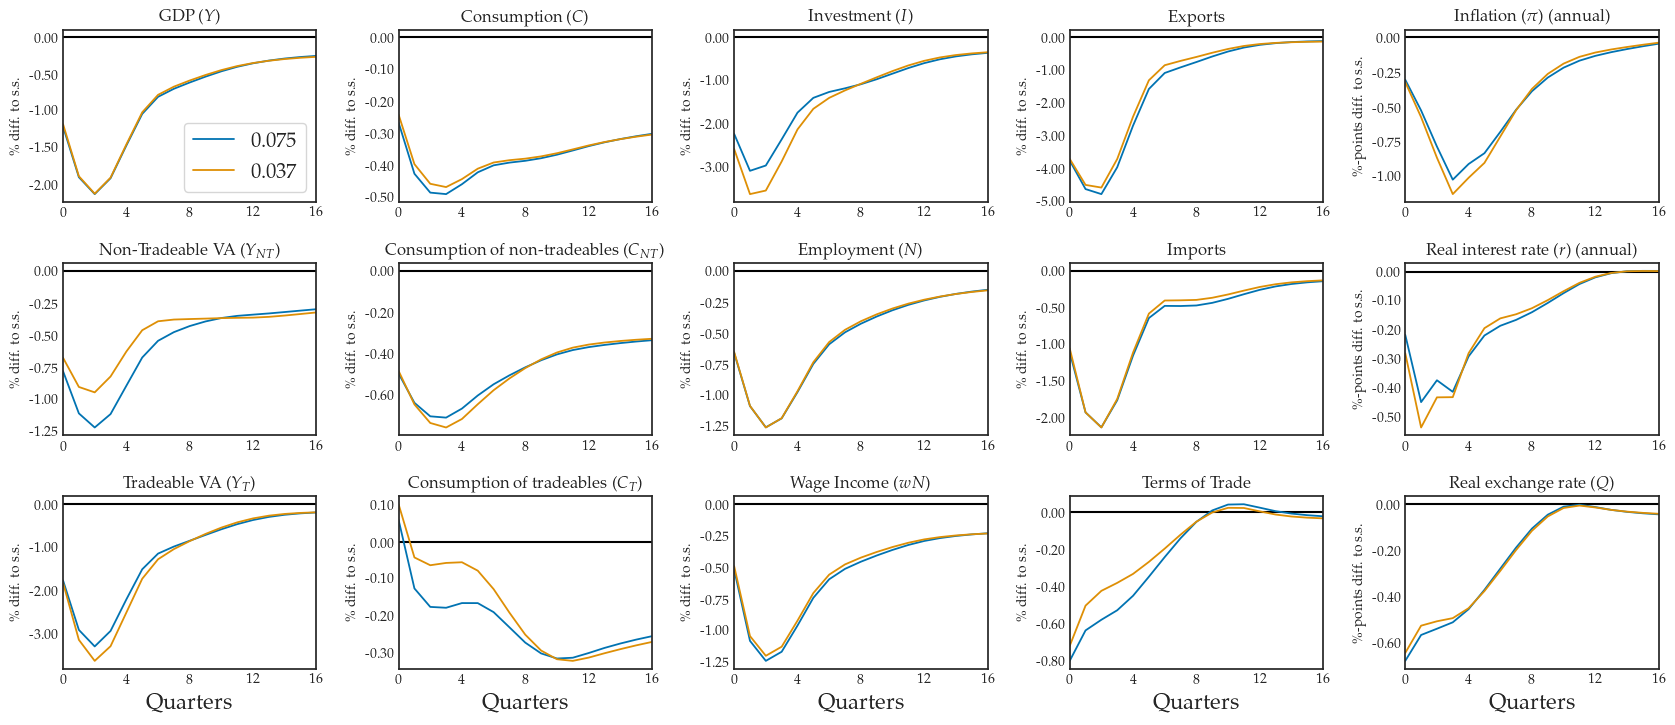

### NKslope_NT ###
{'NKslope_NT': 0.03397053387483114}


GEModelTools: No improvement for 5 iterations
{'NKslope_NT': 0.13588213549932457}


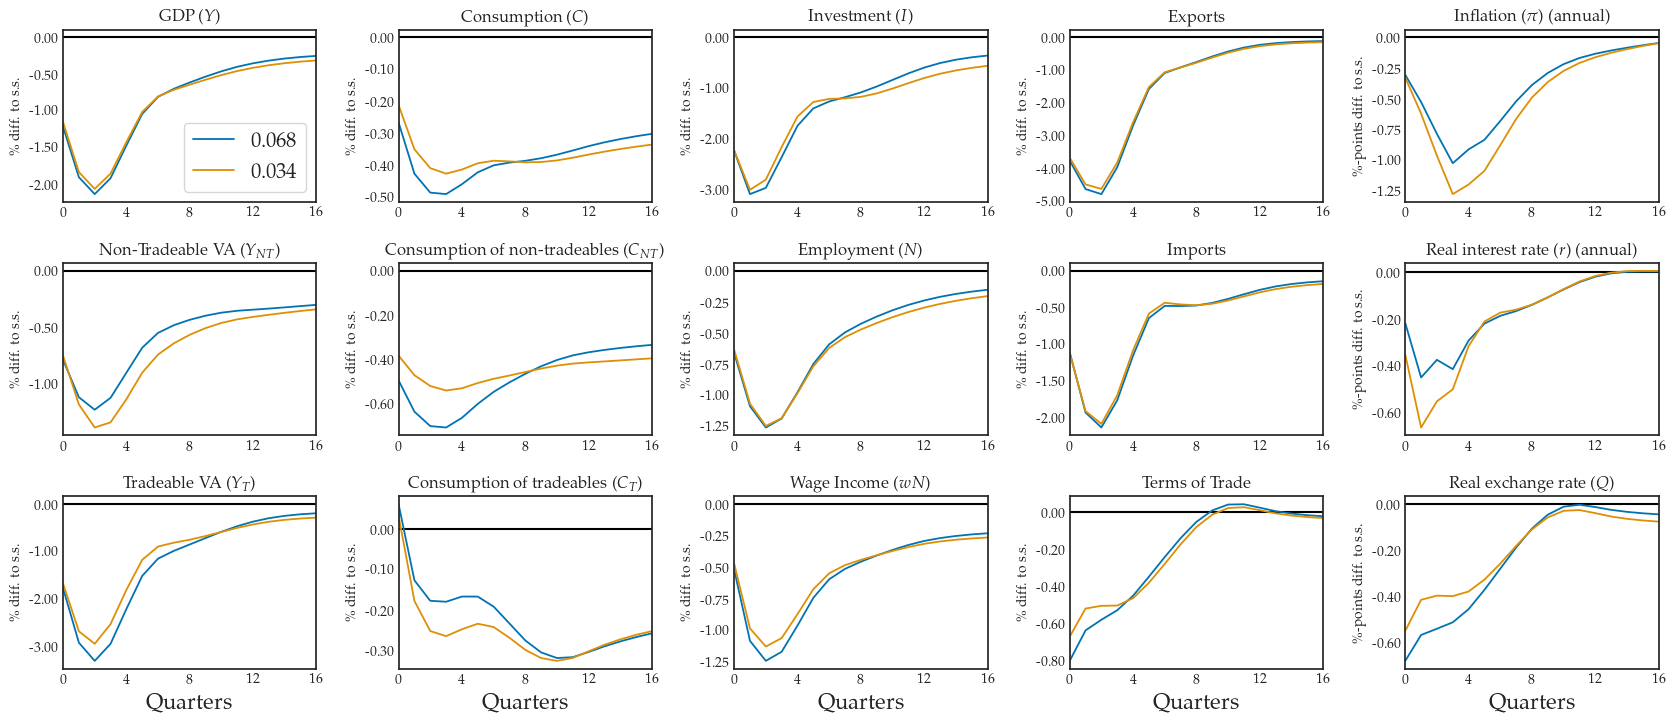

### NKWslope__T ###
{'NKWslope__T': 0.024657923734965337}


{'NKWslope__T': 0.09863169493986135}


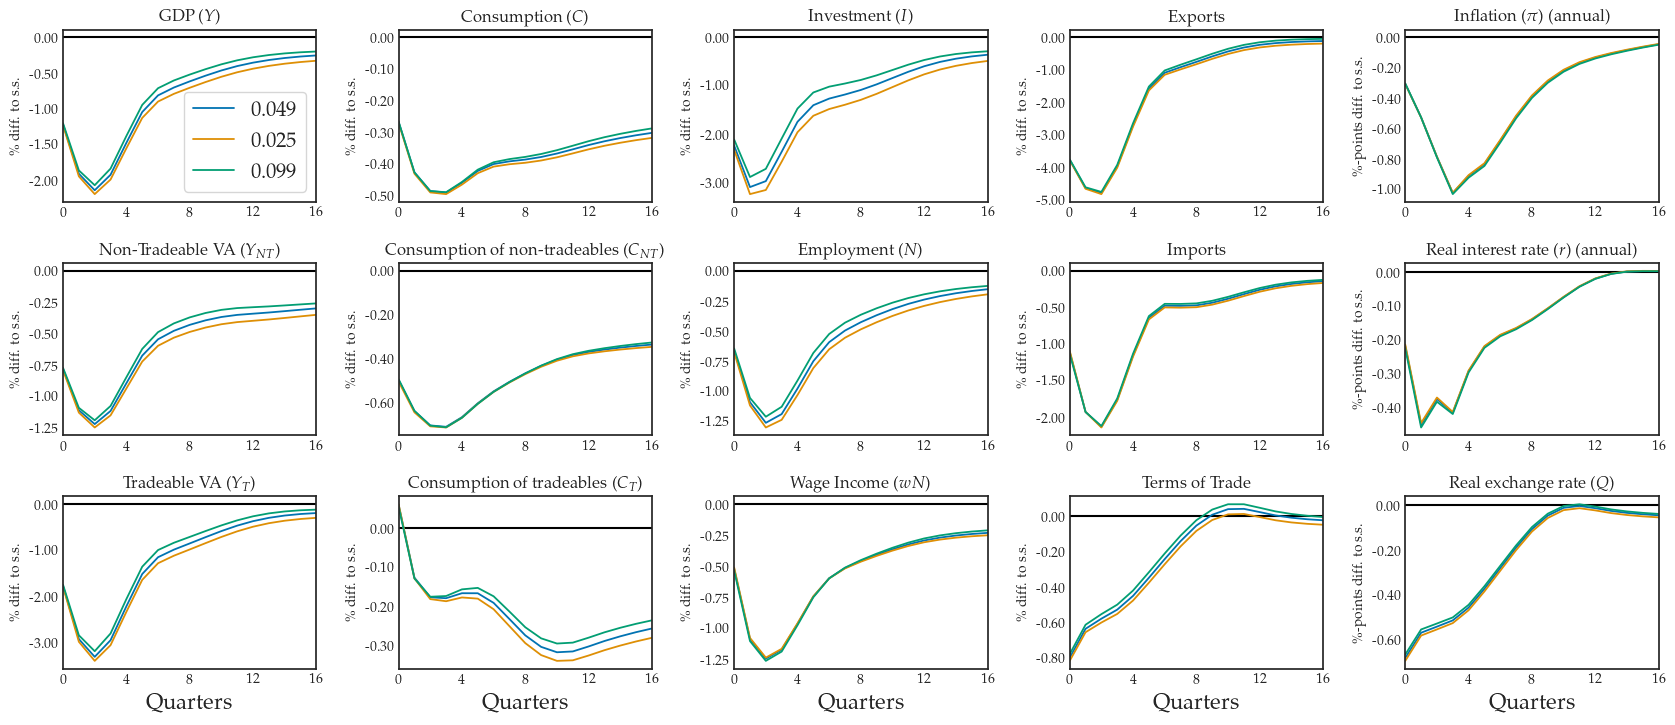

### NKWslope_NT ###
{'NKWslope_NT': 0.0002447589735}


{'NKWslope_NT': 0.000979035894}


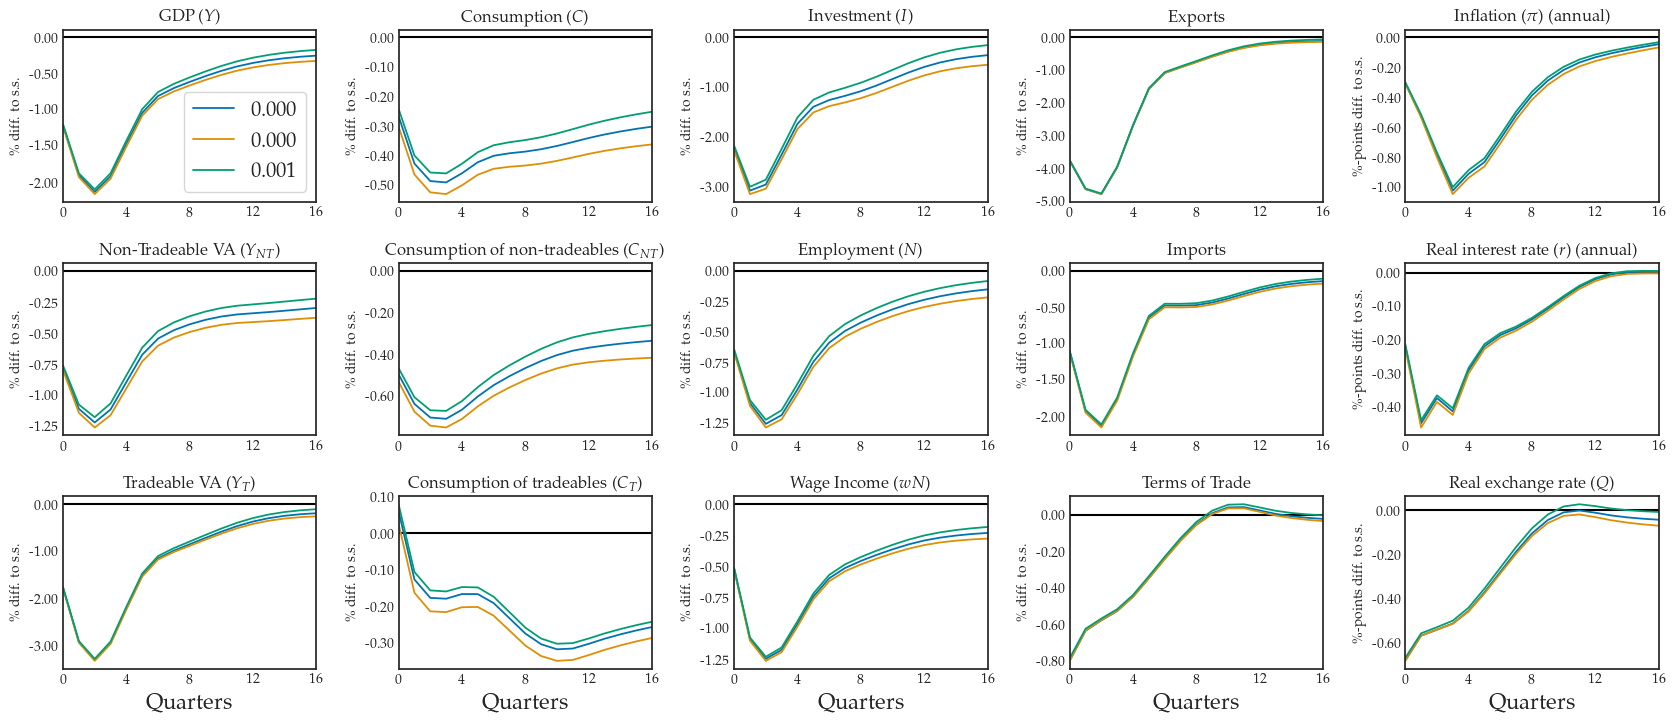

### pi_index ###
{'pi_index': 0.0}


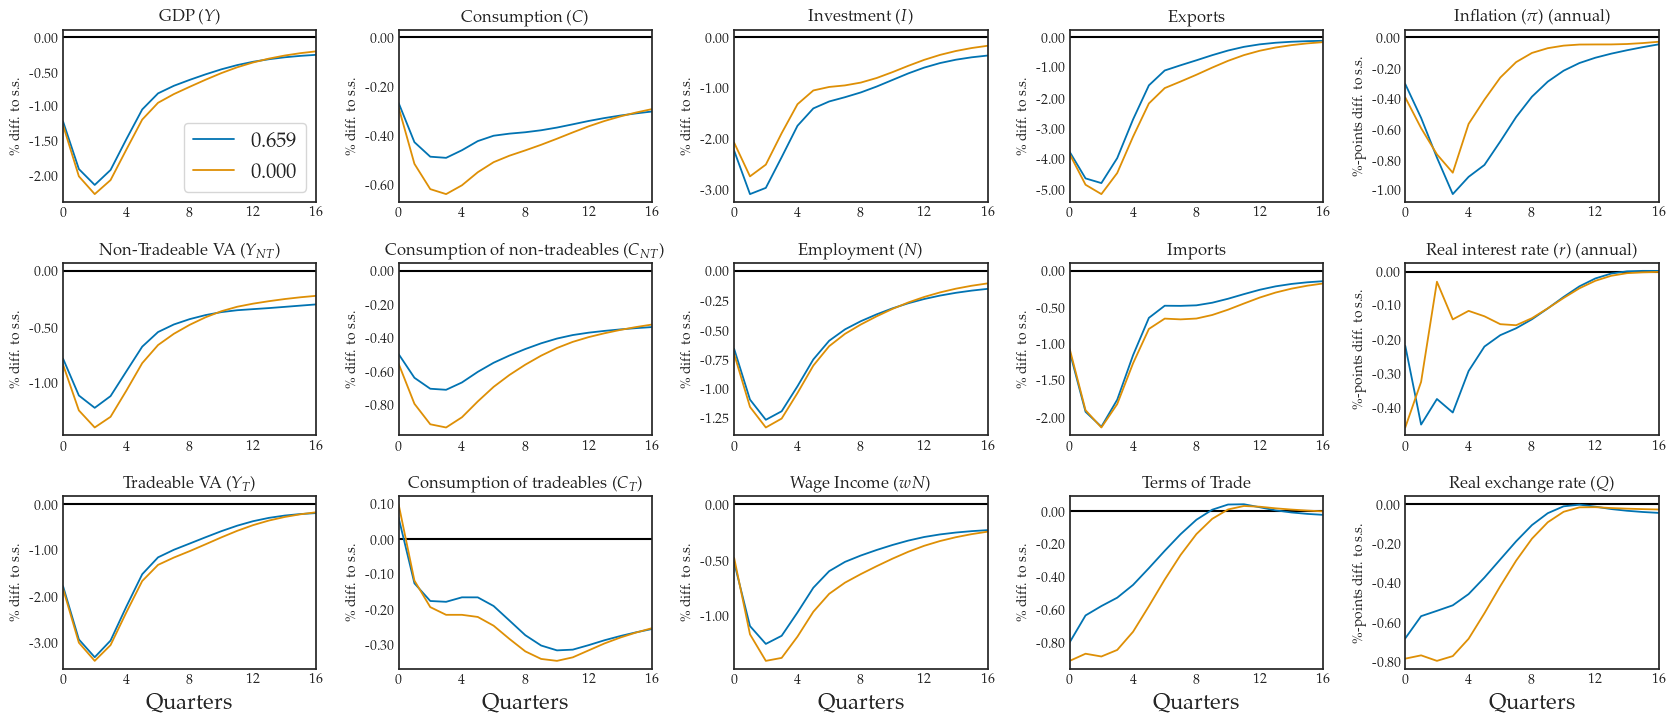

### phi ###
{'phi': 1.1710291632729213}


GEModelTools: No improvement for 5 iterations
{'phi': 1.6841166530916851}


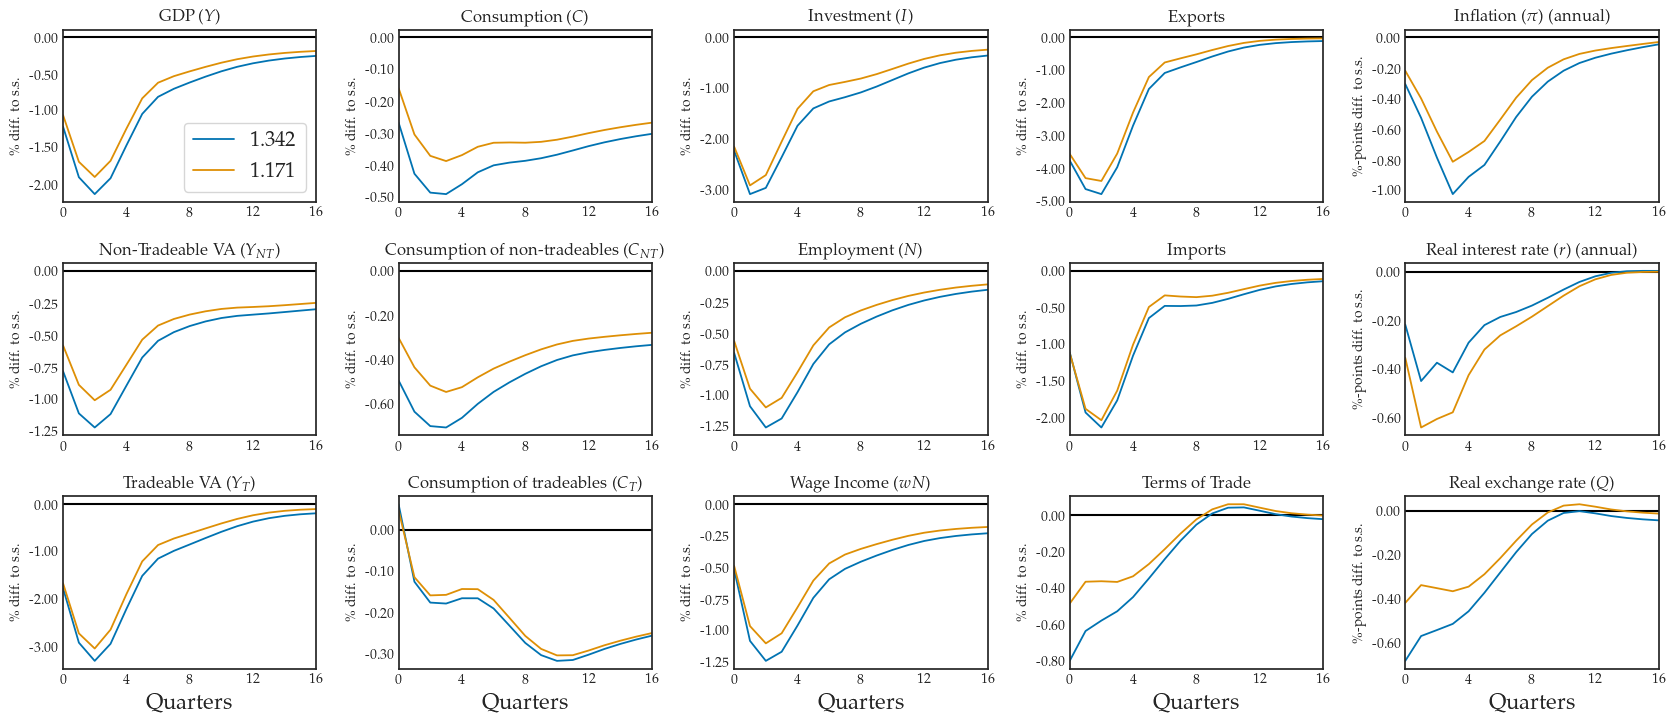

### phi_back ###
{'phi_back': 0.07052585564755418}


{'phi_back': 0.2821034225902167}


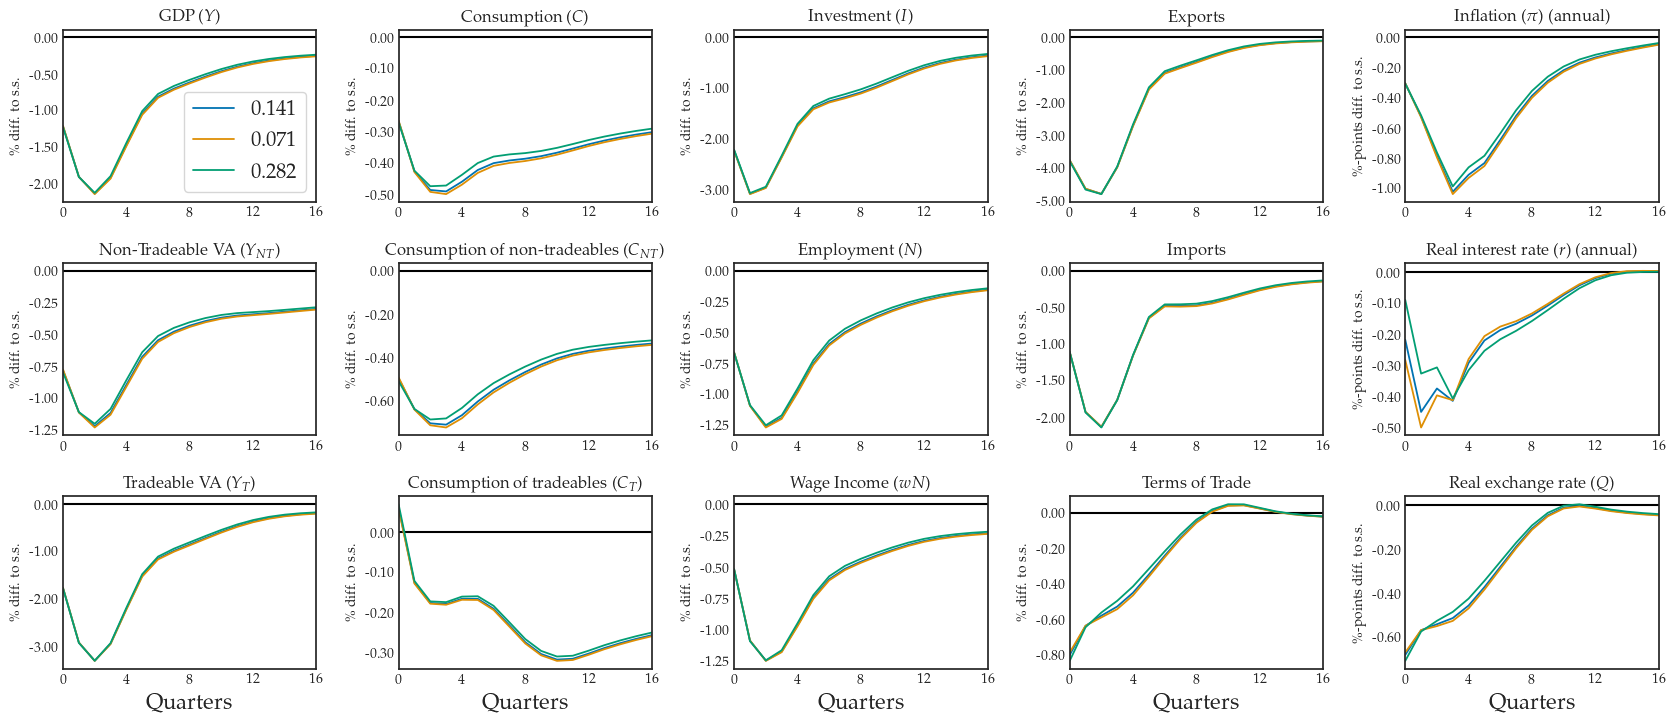

### etaT ###
{'etaT': 0.5}


{'etaT': 2.0}


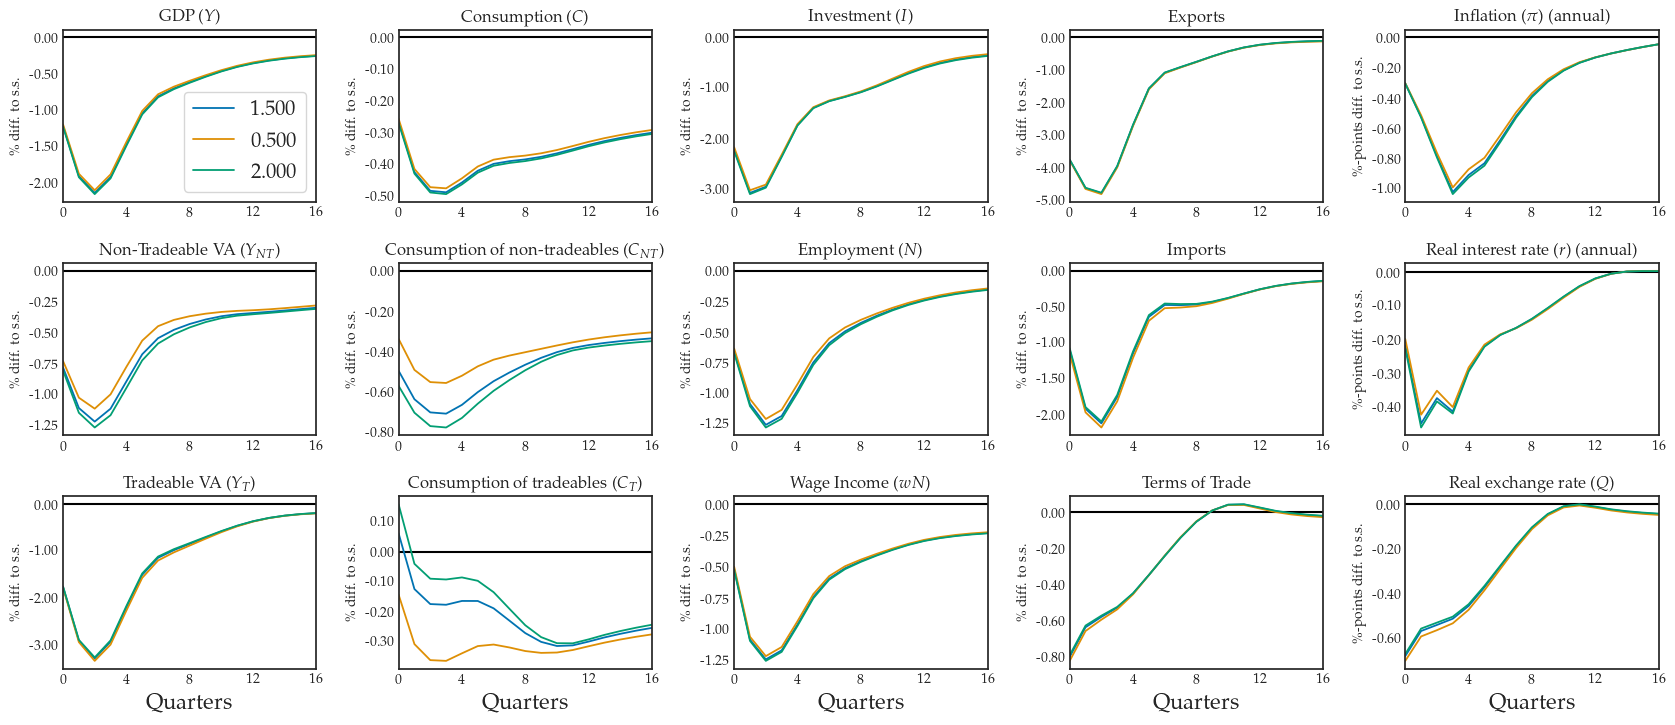

### eta ###
{'eta': 0.5}


{'eta': 2.0}


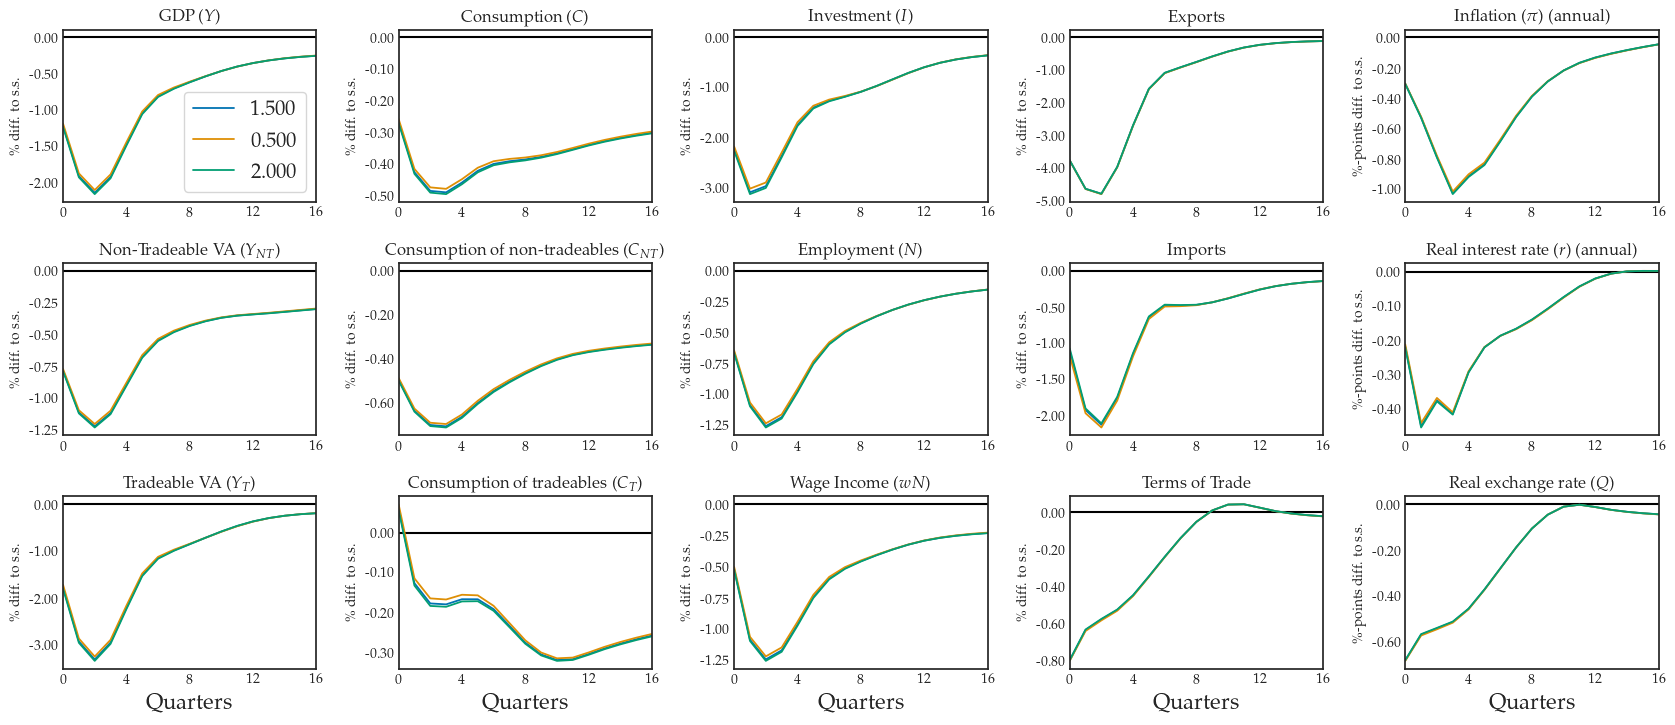

### phi_N ###
{'phi_N': 0.01}


{'phi_N': 70.0}


GEModelTools: No improvement for 5 iterations


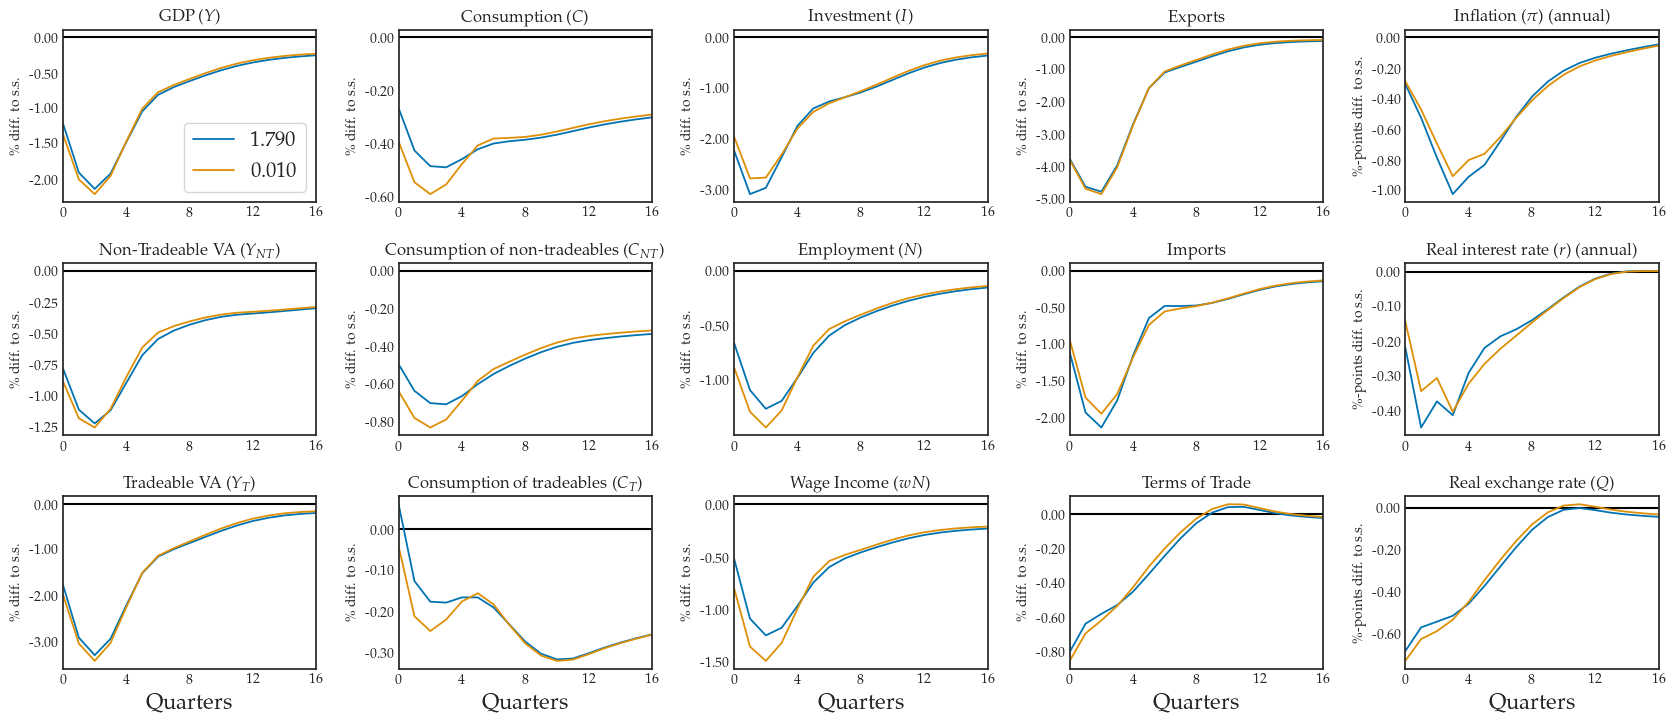

### UIP_dev ###
{'UIP_dev': 0.0}


{'UIP_dev': 2.219564466367798}


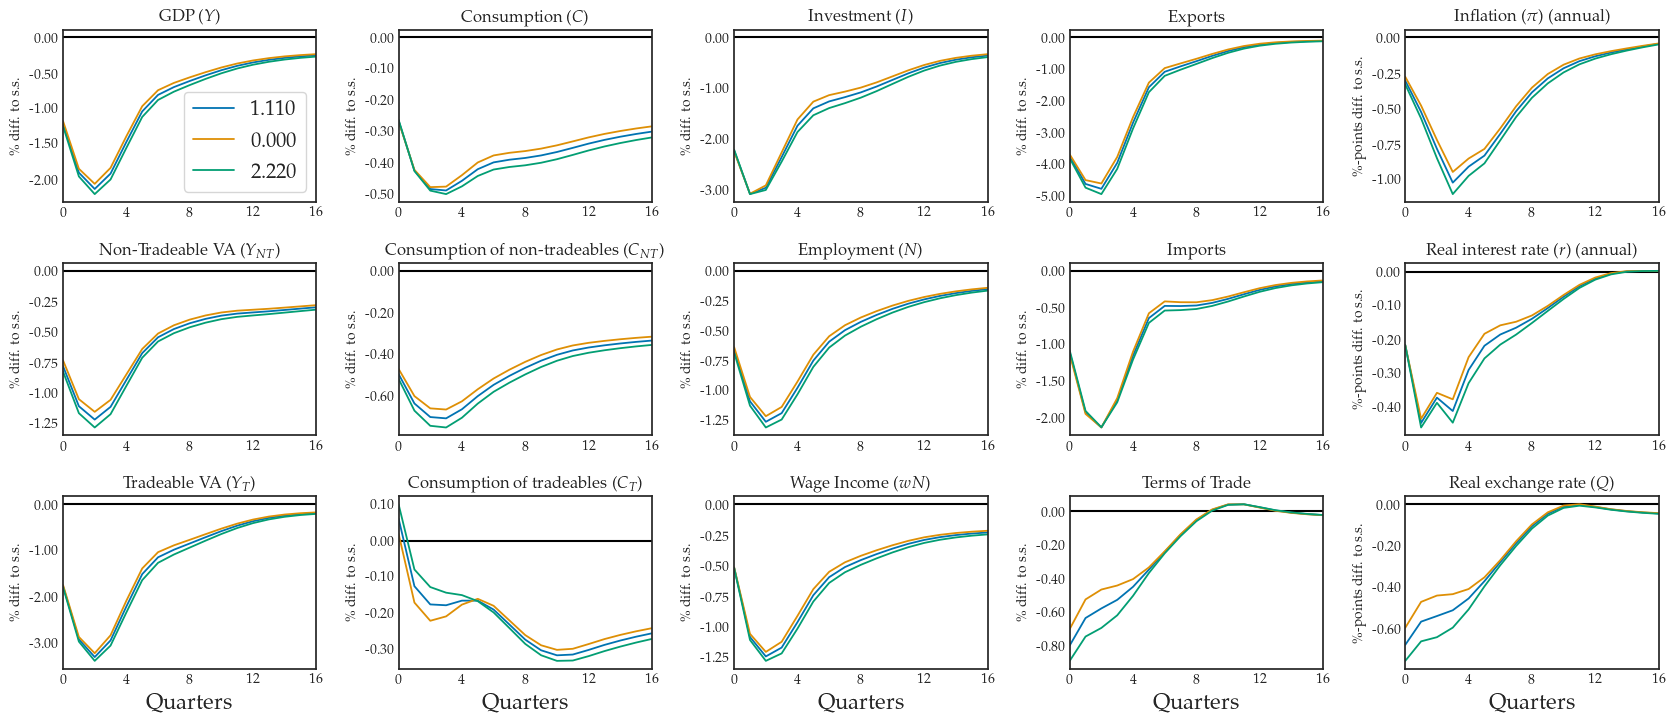

### phi_X ###
{'phi_X': 0.0}


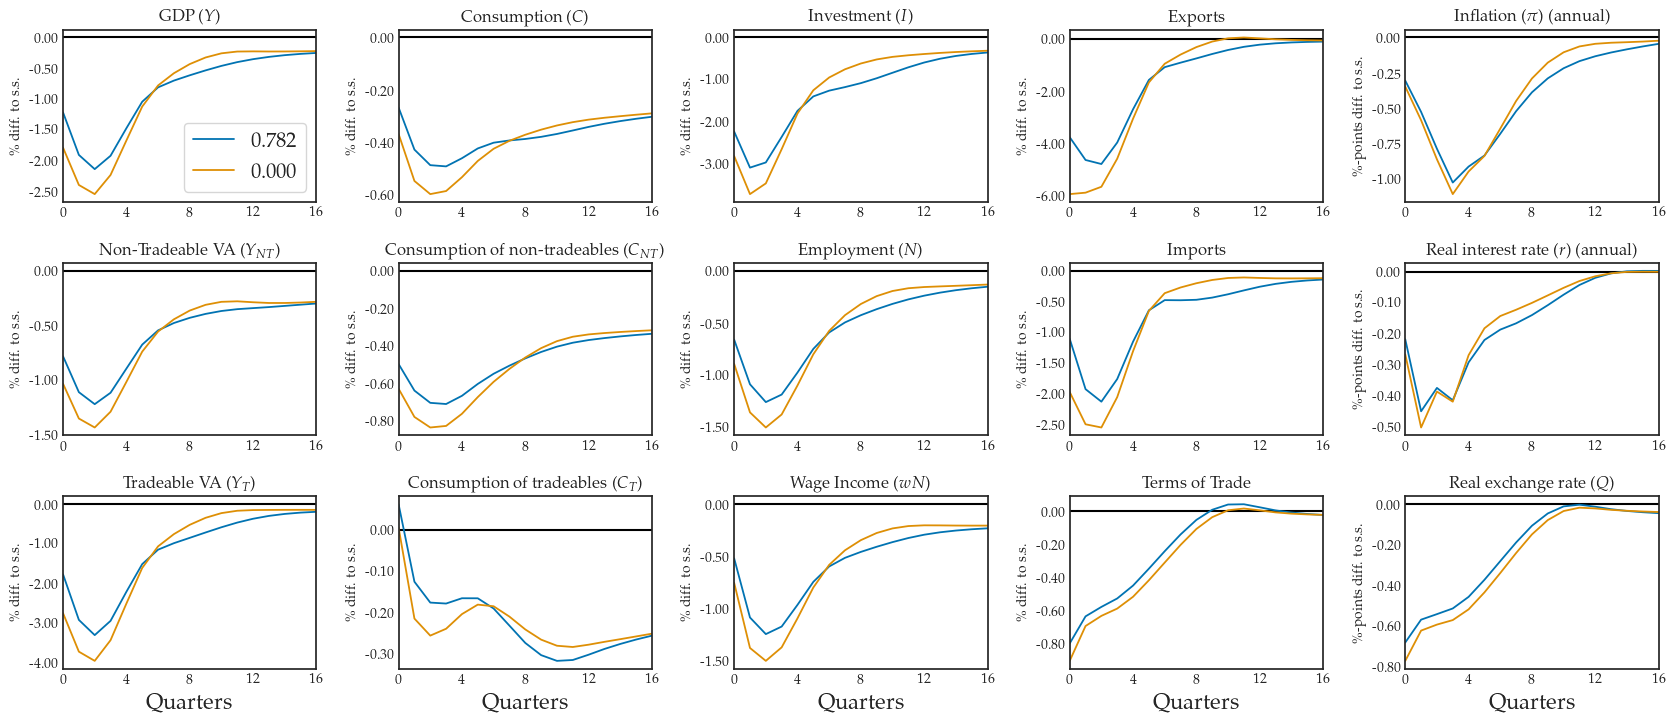

### gamma ###
{'gamma': 1.4879877752202666}


{'gamma': 5.951951100881066}


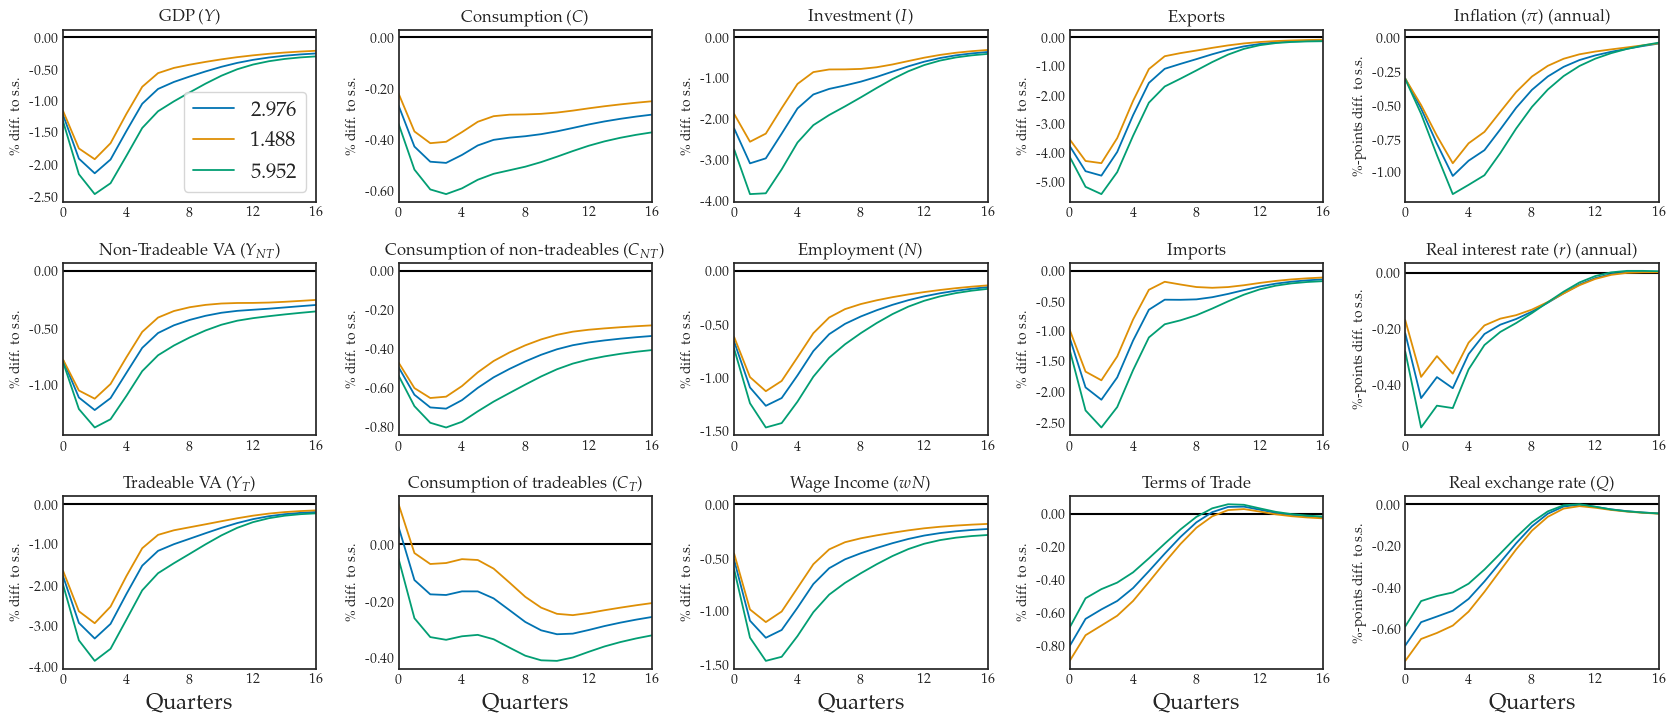

### piW_index ###
{'piW_index': 0.0}


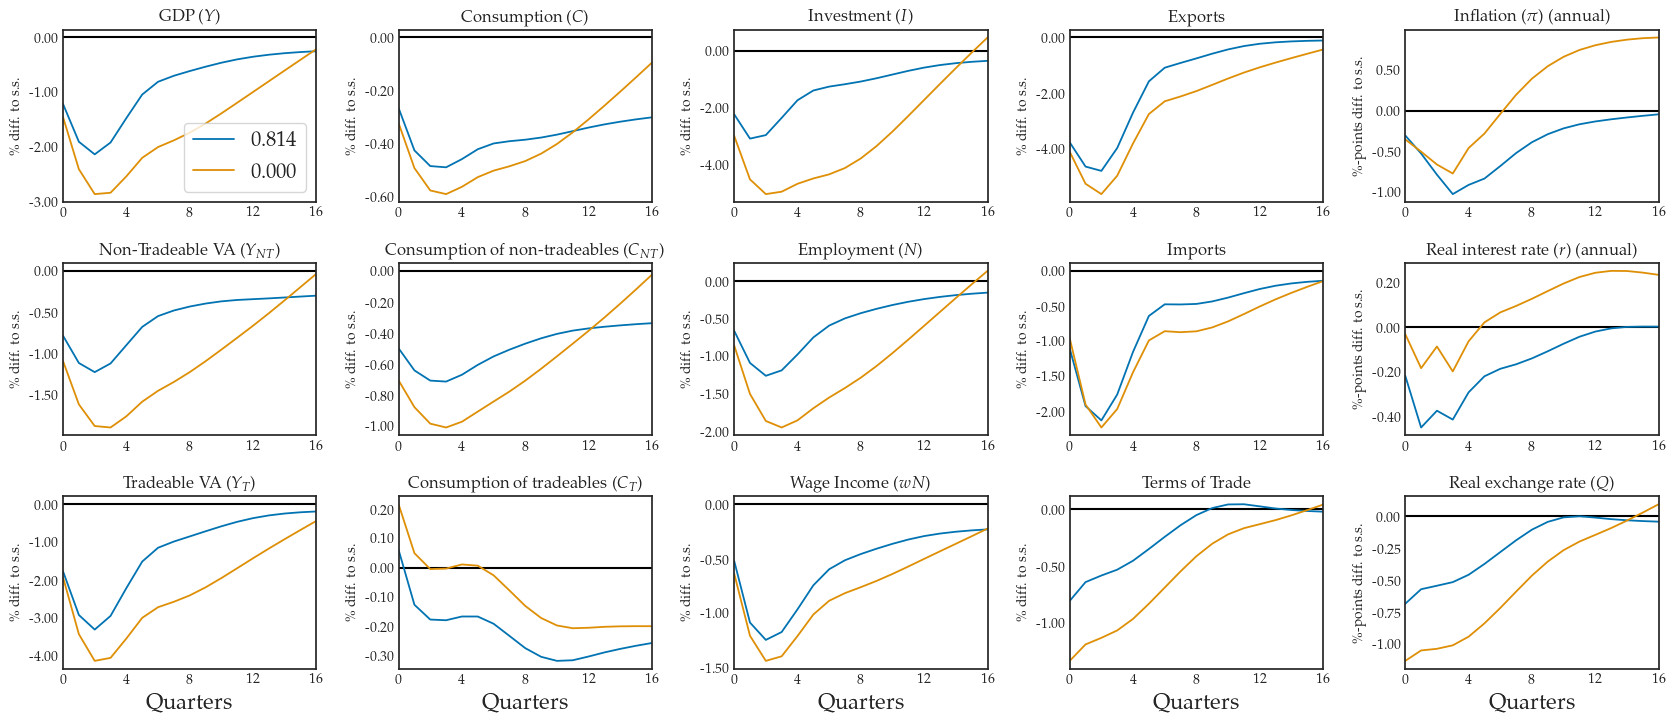

In [3]:
estpars = ['phi_I','kappa_r','NKslope__T','NKslope_NT','NKWslope__T','NKWslope_NT',
    'pi_index','phi','phi_back','etaT','eta','phi_N','UIP_dev','phi_X','gamma','piW_index']

for estpar in estpars:

    print(f'### {estpar} ###')

    pardict = {estpar:np.nan}
    x = model_HANK.get_est_x(pardict)

    if estpar == 'phi':
        pardict[estpar] = (1 + (x[0]-1)/2,1 + (x[0]-1)*2)
    elif estpar in ['phi_I','phi_N']:
        pardict[estpar] = (0.01,70.0)
    elif estpar in ['eta','etaT']:
        pardict[estpar] = (0.5,2.0) 
    elif estpar in ['UIP_dev','kappa_r']:
        pardict[estpar] = (0.0,x[0]*2) 
    elif estpar in ['pi_index','piW_index','phi_X']:
        pardict[estpar] = (0.0,)
    else:
        pardict[estpar] = (x[0]/2,x[0]*2)

    models = copies(model_HANK,[{estpar:pardict[estpar][i]} for i in range(len(pardict[estpar]))])
    labels =  [f'{x[0]:.3f}'] + [f'{pardict[estpar][i]:.3f}' for i,model in enumerate(models[1:])]

    paths = figs.paths_defaults['standard']
    fig = figs.show_IRFs(models=models,paths=paths,labels=labels,figsize=[3.4,2.5])  
